# Problem 1
## Part 1
Generate 20 random points in d = 3 from a Gaussian multivariate distribution with mean $[0, 0, 0]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.7
    \end{bmatrix}$$
    
Call this data label 1. Do the same for another Gaussian with mean $[1, 1, 1]$ and cov matrix:
$$\begin{bmatrix}
    0.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 0.01 
    \end{bmatrix}$$
    
Call this data label 2. Create a 3 d plot of the data points, labeled.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy.matlib
from sklearn.preprocessing import normalize
%matplotlib notebook

In [2]:
# Define variables

mu_1 = np.zeros(3)
mu_2 = np.ones(3)
var_1 = np.array([0.5, 0.5, 0.7])
var_2 = np.array([0.5, 0.5, 0.01])
cov_1 = np.multiply(np.matlib.eye(3) , var_1)
cov_2 = np.multiply(np.matlib.eye(3), var_2)
print(cov_1)
print(cov_2)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.7]]
[[0.5  0.   0.  ]
 [0.   0.5  0.  ]
 [0.   0.   0.01]]


In [3]:
# Sample the two vectors of Gaussians

label_1 = np.random.multivariate_normal(mean=mu_1, cov=cov_1, size=20)
label_2 = np.random.multivariate_normal(mean=mu_2, cov=cov_2, size=20)

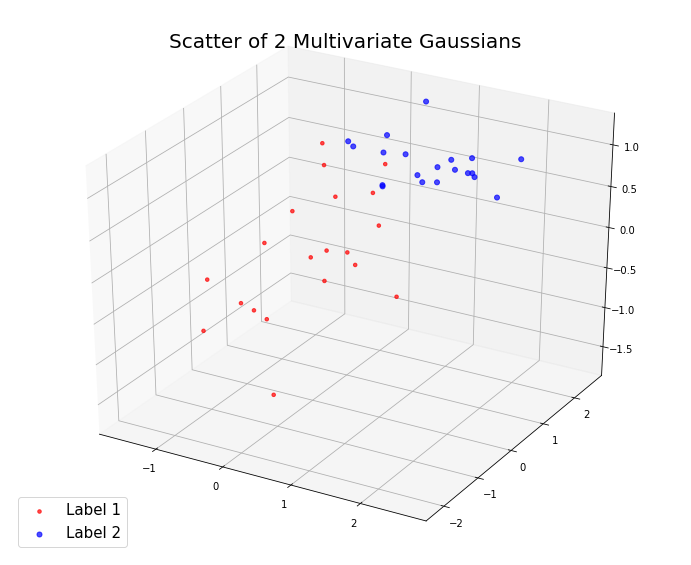

In [4]:
# Why can't python plotting be more like MATLAB plotting :(

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(111, projection='3d')
_ = ax1.scatter(label_1[:,0], label_1[:,1], label_1[:,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], label_2[:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

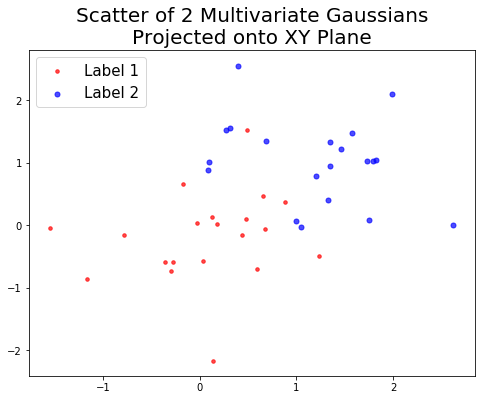

In [5]:
# Projection onto x, y plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,1], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,1], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XY Plane', FontSize=20)
_ = plt.legend(loc=2, prop={'size' : 15})

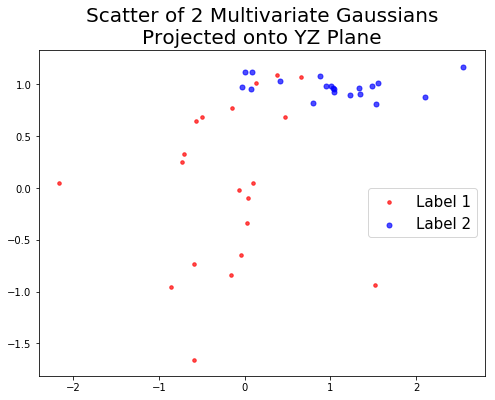

In [6]:
# Projection onto y, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,1], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,1], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto YZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

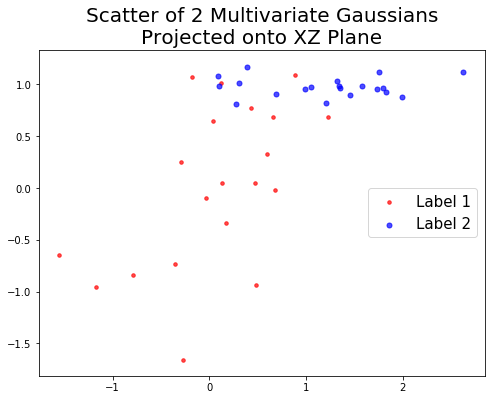

In [7]:
# Projection onto x, z plane

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
_ = ax1.scatter(label_1[:,0], label_1[:,2], alpha=0.7, 
                s=50, color = 'red', marker='.', label="Label 1")
_ = ax1.scatter(label_2[:,0], label_2[:,2], alpha=0.7, 
                s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians\nProjected onto XZ Plane', FontSize=20)
_ = plt.legend(loc=5, prop={'size' : 15})

## Part 2

The points just look like a cloud duh

## Part 3
Concatenate points and find covariance matrix

In [8]:
# Split up the distribution

G = np.vstack((label_1, label_2))
X = G[:,0]
Y = G[:,1]
Z = G[:,2]

In [9]:
# Calculate the covariance matrix by hand

def Cov(x, y):
    return np.dot(x,y)/(x.shape[0] - 1)
#mu_1 = 0.5
#mu_2 = 0.5
#mu_3 = 0.5    
mu_1 = (np.sum(X)/X.shape[0])
mu_2 = (np.sum(Y)/Y.shape[0])
mu_3 = (np.sum(Z)/Z.shape[0])
mse_1 = np.subtract(X, mu_1)
mse_2 = np.subtract(Y, mu_2)
mse_3 = np.subtract(Z, mu_3)

means = [mu_1, mu_2, mu_3]
#means = 0.5*np.ones(3)
mses = [mse_1, mse_2, mse_3]

cov_matrix = np.zeros((3,3))
for i in range(cov_matrix.shape[0]):
    for j in range(cov_matrix.shape[1]):
        cov_matrix[i,j] = Cov(mses[i], mses[j])

In [10]:
print(cov_matrix)
print(np.cov(G.T))

[[0.79521675 0.33018575 0.42289559]
 [0.33018575 0.86466397 0.32471098]
 [0.42289559 0.32471098 0.54333684]]
[[0.79521675 0.33018575 0.42289559]
 [0.33018575 0.86466397 0.32471098]
 [0.42289559 0.32471098 0.54333684]]


# Part 4
Using $k=2$ Find the two eigenvectors of the covariance matrix with the largest eigenvalues Project the data points onto these two vectors and show the 2d plot.

In [11]:
Lamba, V = np.linalg.eig(cov_matrix)
print(Lamba)

# Project u onto v
def proj(u, v):
    a = (np.dot(u, v))/(np.dot(u,u))
    w = a * v
    return w

[1.46376948 0.52107897 0.21836911]


In [12]:
# The two largest eigenvalues are 1 and 3, so we grab the two eigenvectors 
# associated with them. They automatically have an L2 norm == 1
v_1 = V[:,0]
v_3 = V[:,2] 

# Then we center the data. 
G_c_1 = G[:,0] - np.mean(G[:,0])
G_c_2 = G[:,1] - np.mean(G[:,1])
G_c_3 = G[:,2] - np.mean(G[:,2])
G_centered = np.column_stack((G_c_1, G_c_2, G_c_3))

projection = np.zeros((40, 3))
for i in range(G.shape[0]):
    proj_1 = np.dot(np.dot(G_centered[i,:], v_1), v_1)
    proj_2 = np.dot(np.dot(G_centered[i,:], v_3), v_3)
    tmp = proj_1 +  proj_2
    projection[i,:] = tmp

#print(projection)
print(np.mean(G_c_1))

-2.7755575615628915e-18


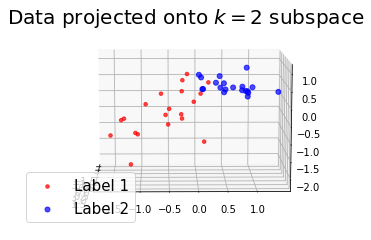

In [15]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(projection[:20,0], projection[:20,1], projection[:20,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax.scatter(projection[20:,0], projection[20:,1], projection[20:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Data projected onto $k=2$ subspace', FontSize=20)
_ = plt.legend(loc=3, prop={'size' : 15})

for ii in range(0,360,1):
        ax.view_init(elev=10., azim=ii)
        #savefig("movie%d.png" % ii)
